### Required Packages

In [106]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
    RobustScaler, Normalizer, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from matplotlib import style
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px

warnings.filterwarnings("ignore")
plt.style.use('Solarize_Light2')


### Read Data

In [107]:
data = pd.read_csv('Datasets/CC.csv', index_col='CUST_ID')

#### Edit Data Columns Naming

In [108]:
data.columns = data.columns.str.lower()
data.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')

#### Show Data Types

In [109]:
data.dtypes

balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

#### Data Size

In [110]:
data.shape

(8950, 17)

#### Data Summary

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  cred

In [112]:
data.describe(include="all").T

count         mean          std        min  \
balance                           8950.0  1564.474828  2081.531879   0.000000   
balance_frequency                 8950.0     0.877271     0.236904   0.000000   
purchases                         8950.0  1003.204834  2136.634782   0.000000   
oneoff_purchases                  8950.0   592.437371  1659.887917   0.000000   
installments_purchases            8950.0   411.067645   904.338115   0.000000   
cash_advance                      8950.0   978.871112  2097.163877   0.000000   
purchases_frequency               8950.0     0.490351     0.401371   0.000000   
oneoff_purchases_frequency        8950.0     0.202458     0.298336   0.000000   
purchases_installments_frequency  8950.0     0.364437     0.397448   0.000000   
cash_advance_frequency            8950.0     0.135144     0.200121   0.000000   
cash_advance_trx                  8950.0     3.248827     6.824647   0.000000   
purchases_trx                     8950.0    14.709832    24.857649   0.000000   
credit_limit                      8949.0  4494.449450  3638.815725  50.000000   
payments                          8950.0  1733.143852  2895.063757   0.000000   
minimum_payments                  8637.0   864.206542  2372.446607   0.019163   
prc_full_payment                  8950.0     0.153715     0.292499   0.000000   
tenure                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
balance                            128.281915   873.385231  2054.140036   
balance_frequency                    0.888889     1.000000     1.000000   
purchases                           39.635000   361.280000  1110.130000   
oneoff_purchases                     0.000000    38.000000   577.405000   
installments_purchases               0.000000    89.000000   468.637500   
cash_advance                         0.000000     0.000000  1113.821139   
purchases_frequency                  0.083333     0.500000     0.916667   
oneoff_purchases_frequency           0.000000     0.083333     0.300000   
purchases_installments_frequency     0.000000     0.166667     0.750000   
cash_advance_frequency               0.000000     0.000000     0.222222   
cash_advance_trx                     0.000000     0.000000     4.000000   
purchases_trx                        1.000000     7.000000    17.000000   
credit_limit                      1600.000000  3000.000000  6500.000000   
payments                           383.276166   856.901546  1901.134317   
minimum_payments                   169.123707   312.343947   825.485459   
prc_full_payment                     0.000000     0.000000     0.142857   
tenure                              12.000000    12.000000    12.000000   

                                          max  
balance                           19043.13856  
balance_frequency                     1.00000  
purchases                         49039.57000  
oneoff_purchases                  40761.25000  
installments_purchases            22500.00000  
cash_advance                      47137.21176  
purchases_frequency                   1.00000  
oneoff_purchases_frequency            1.00000  
purchases_installments_frequency      1.00000  
cash_advance_frequency                1.50000  
cash_advance_trx                    123.00000  
purchases_trx                       358.00000  
credit_limit                      30000.00000  
payments                          50721.48336  
minimum_payments                  76406.20752  
prc_full_payment                      1.00000  
tenure                               12.00000

> Note: Data Contains Missing Values

### Preprocess Data

#### Missing Values

In [113]:
data.isnull().sum().sort_values(ascending=False)

minimum_payments                    313
credit_limit                          1
balance                               0
cash_advance_frequency                0
prc_full_payment                      0
payments                              0
purchases_trx                         0
cash_advance_trx                      0
purchases_installments_frequency      0
balance_frequency                     0
oneoff_purchases_frequency            0
purchases_frequency                   0
cash_advance                          0
installments_purchases                0
oneoff_purchases                      0
purchases                             0
tenure                                0
dtype: int64

In [114]:
data.dropna(inplace=True)

In [115]:
data.isnull().sum().sort_values(ascending=False)

balance                             0
cash_advance_frequency              0
prc_full_payment                    0
minimum_payments                    0
payments                            0
credit_limit                        0
purchases_trx                       0
cash_advance_trx                    0
purchases_installments_frequency    0
balance_frequency                   0
oneoff_purchases_frequency          0
purchases_frequency                 0
cash_advance                        0
installments_purchases              0
oneoff_purchases                    0
purchases                           0
tenure                              0
dtype: int64

#### Duplicates Detection

In [116]:
data.duplicated().value_counts()

False    8636
dtype: int64

> Note: No Duplicate Data

### EDA

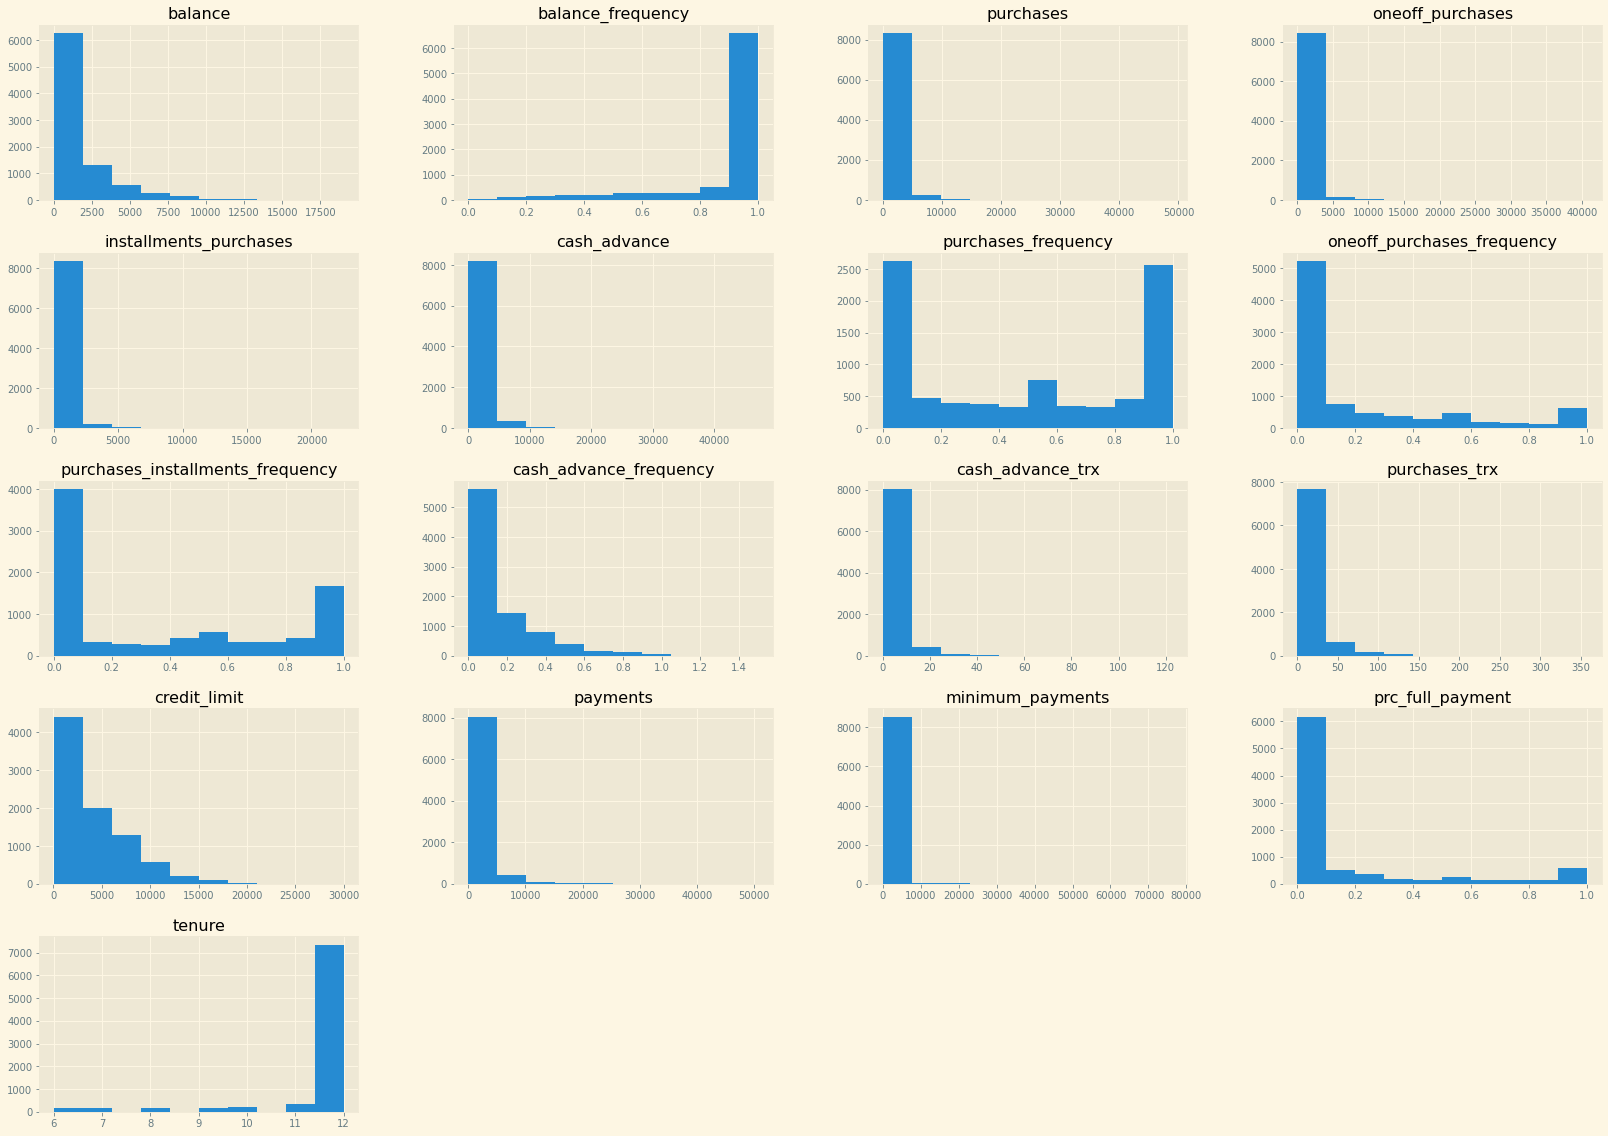

In [117]:
data.hist(figsize=(28,20))
plt.show()

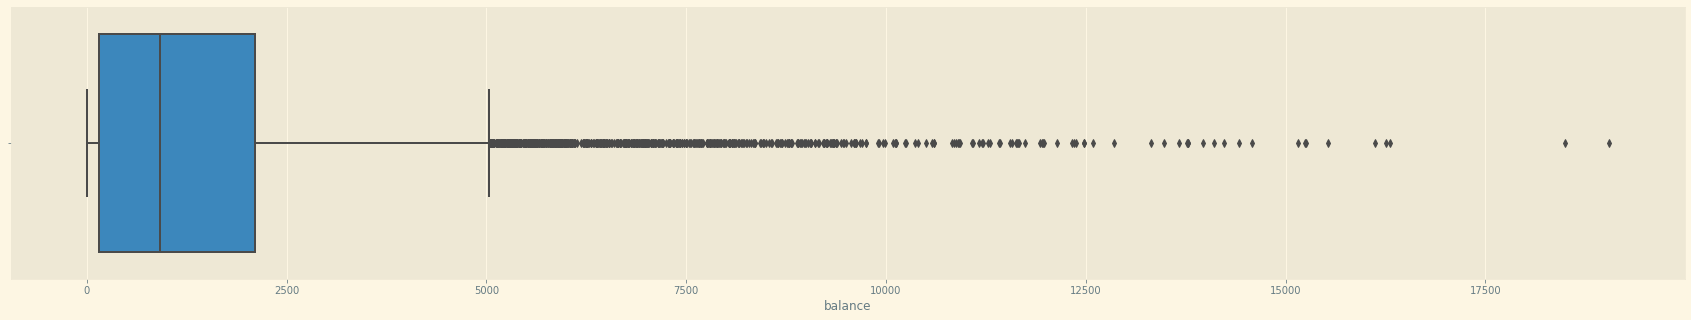

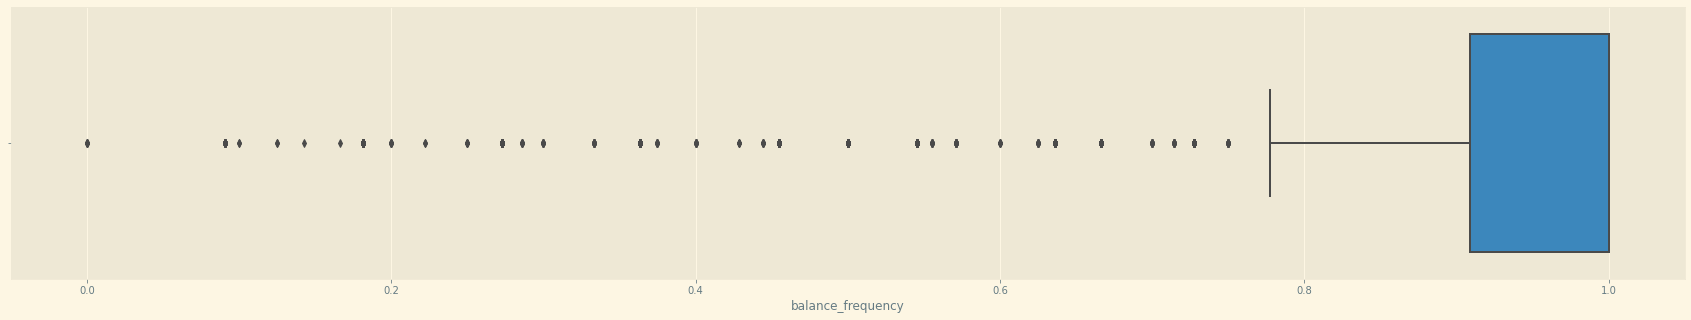

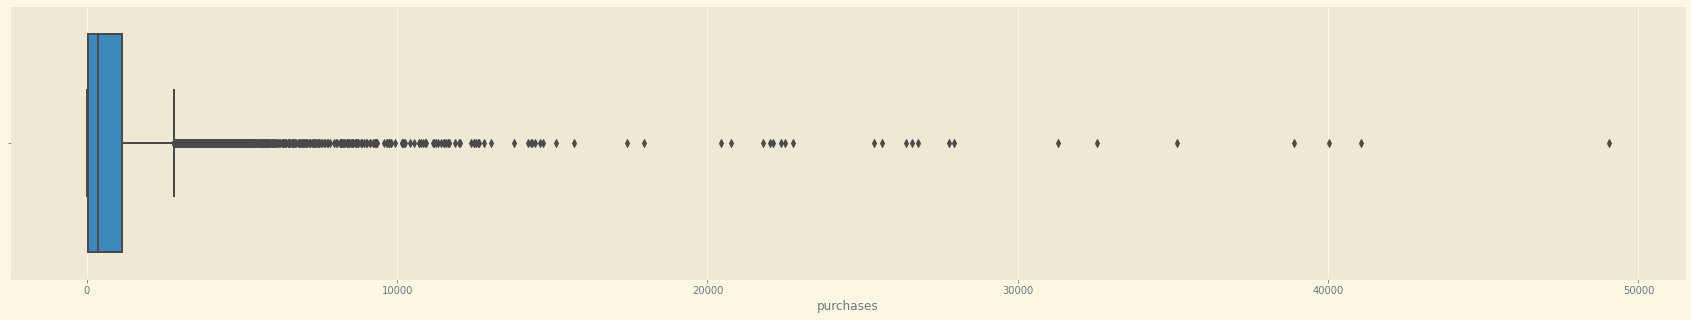

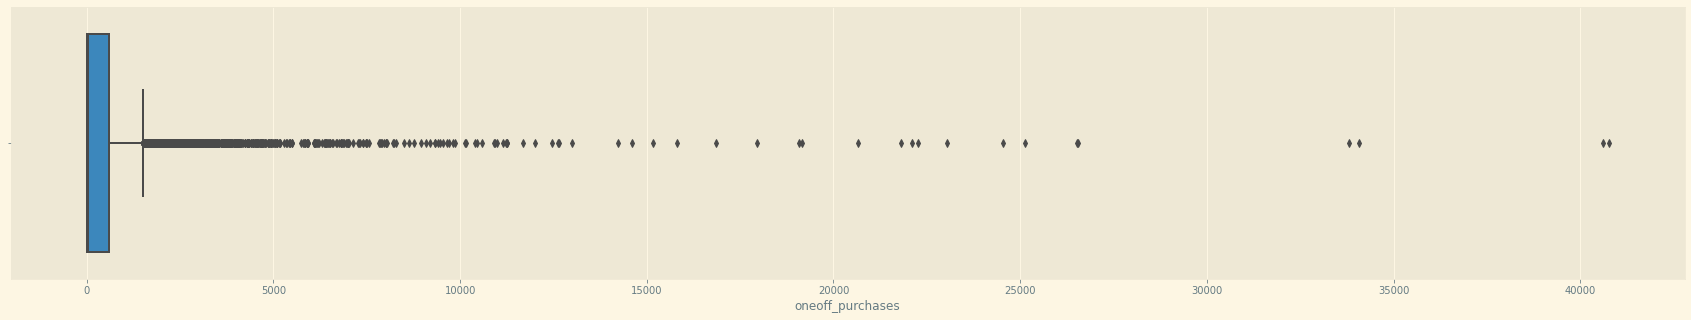

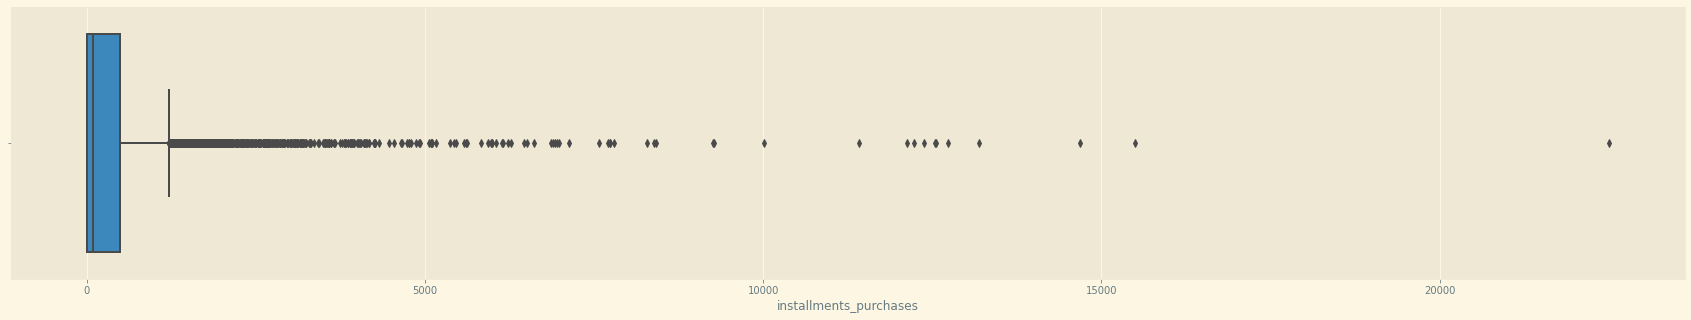

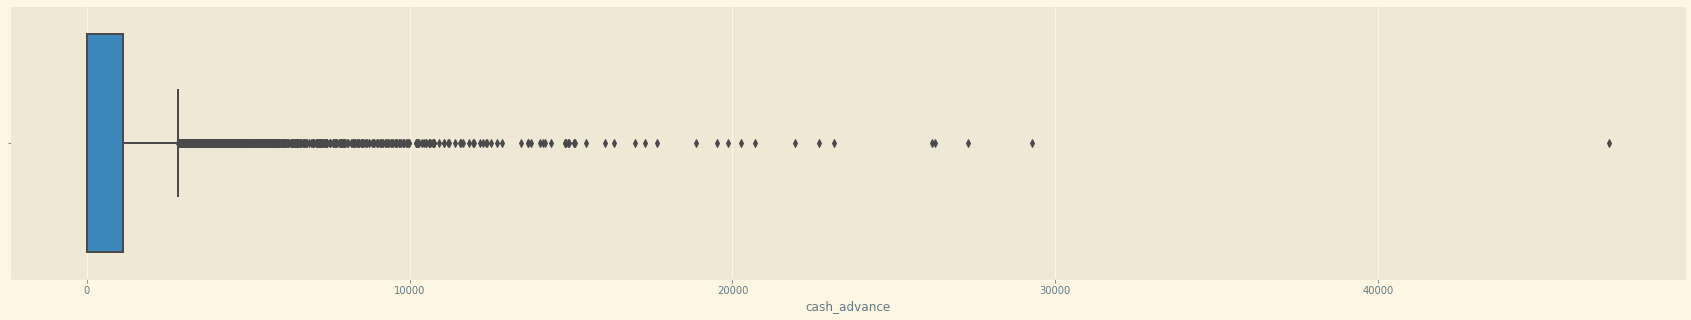

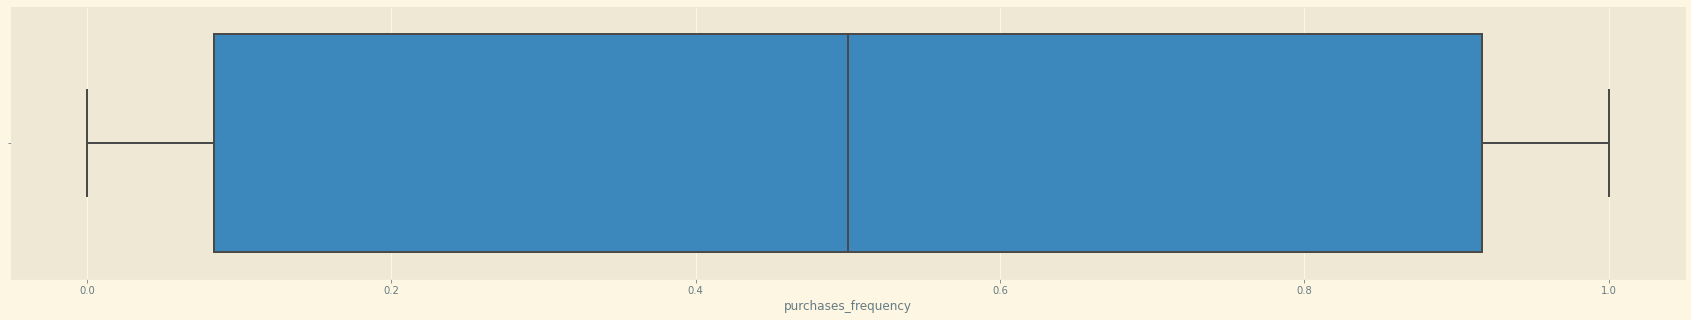

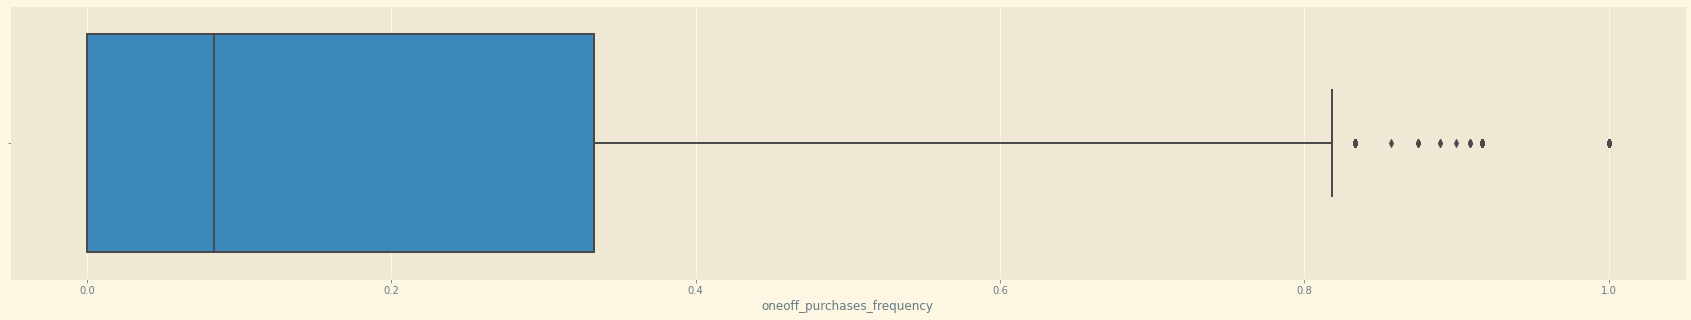

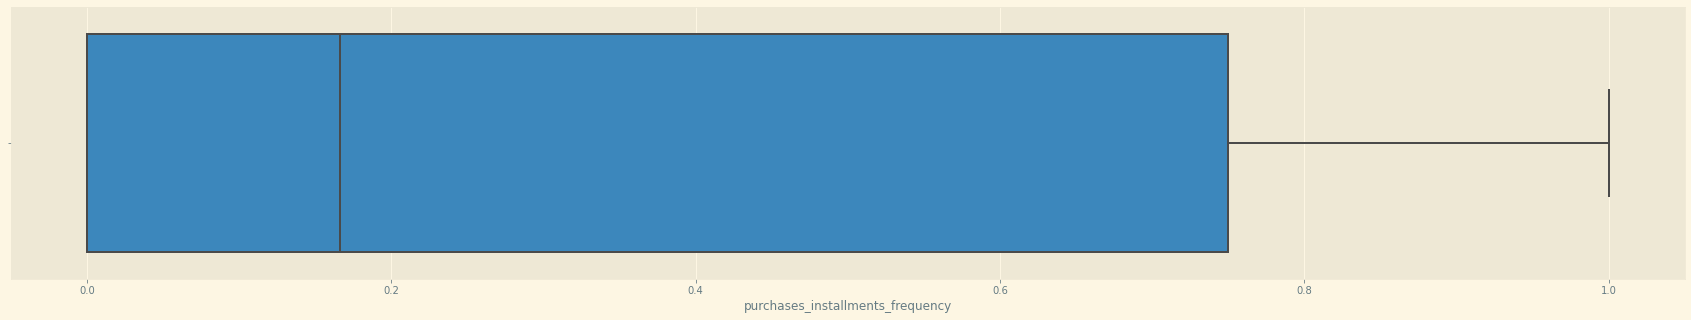

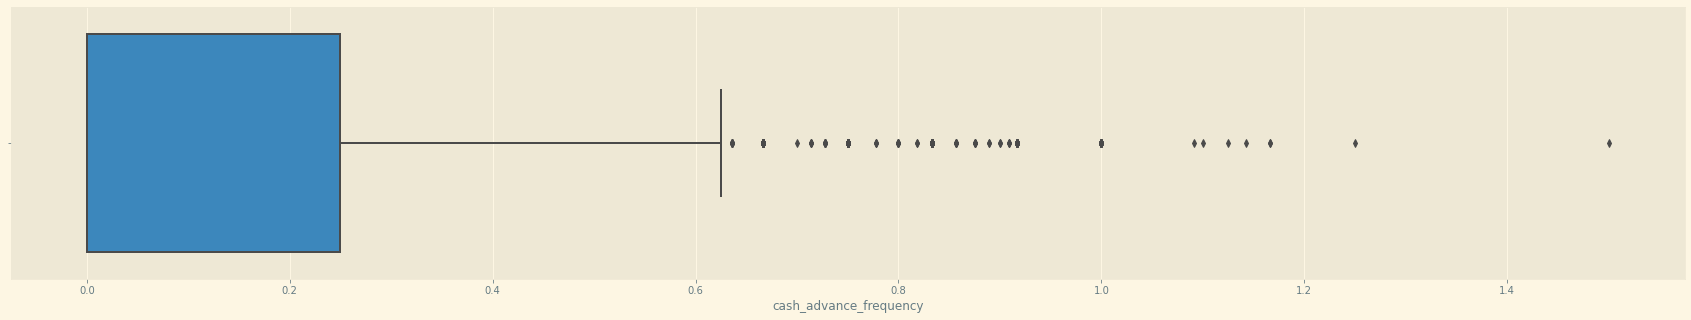

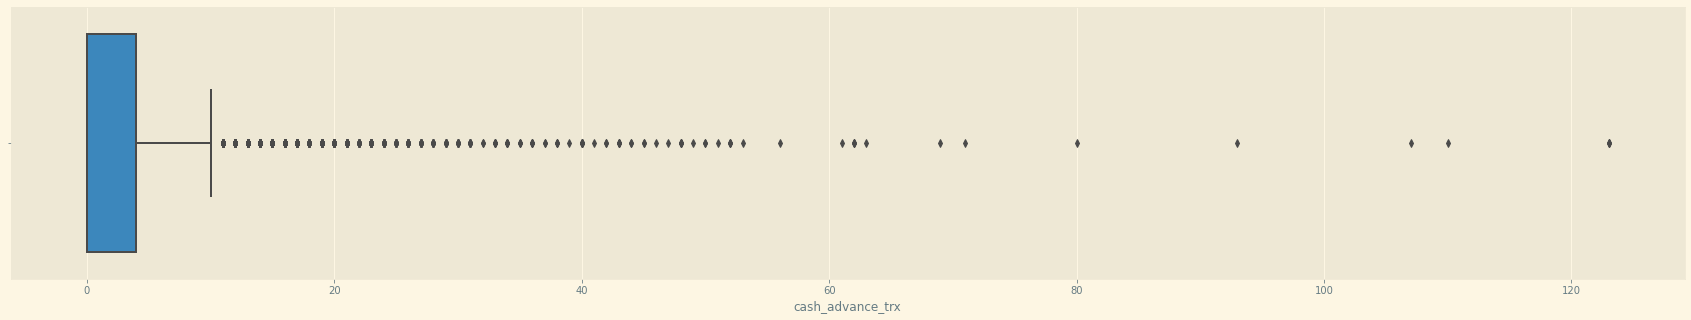

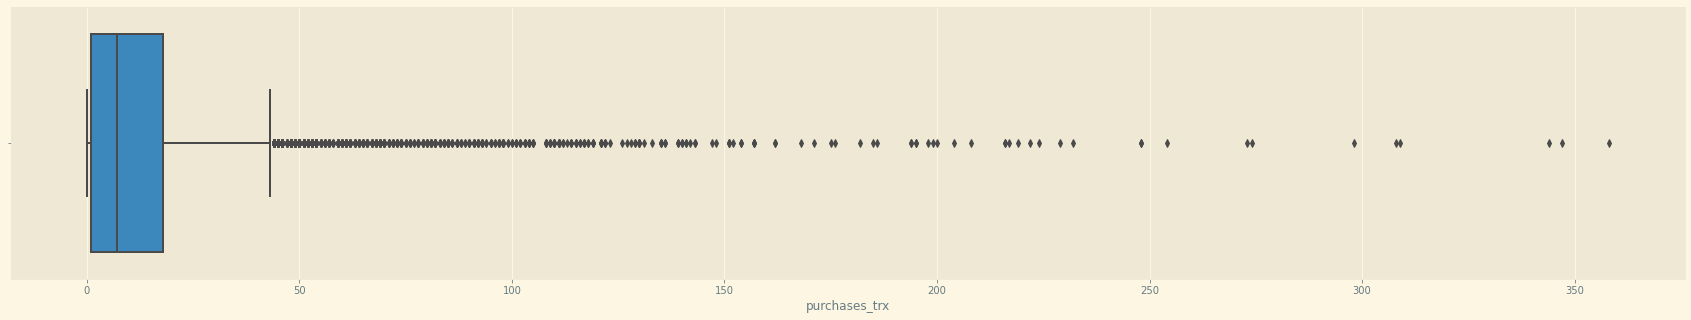

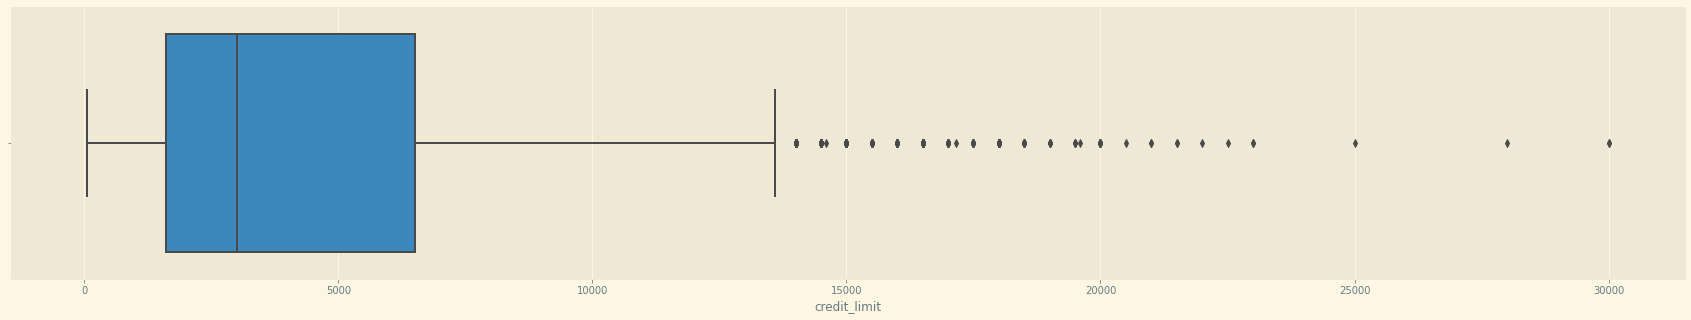

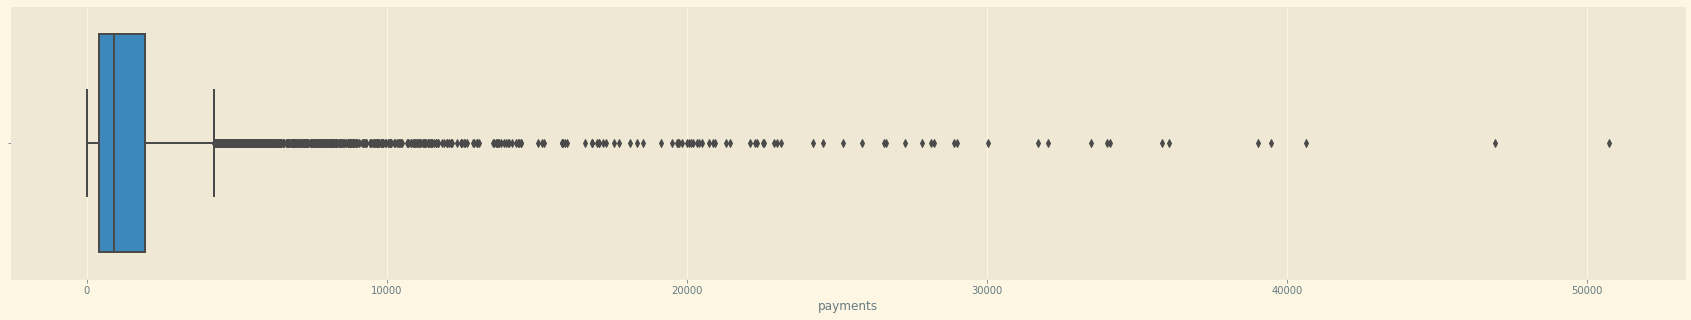

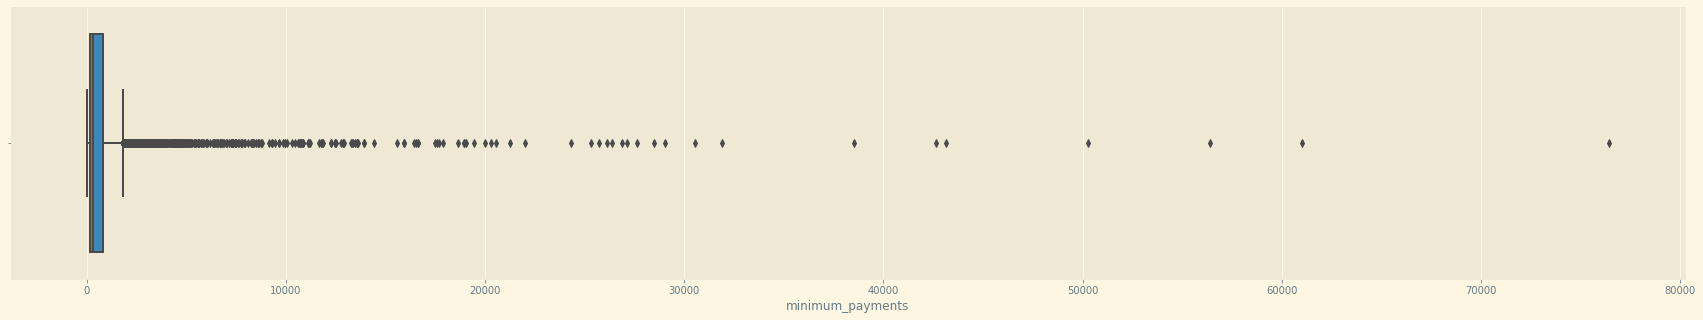

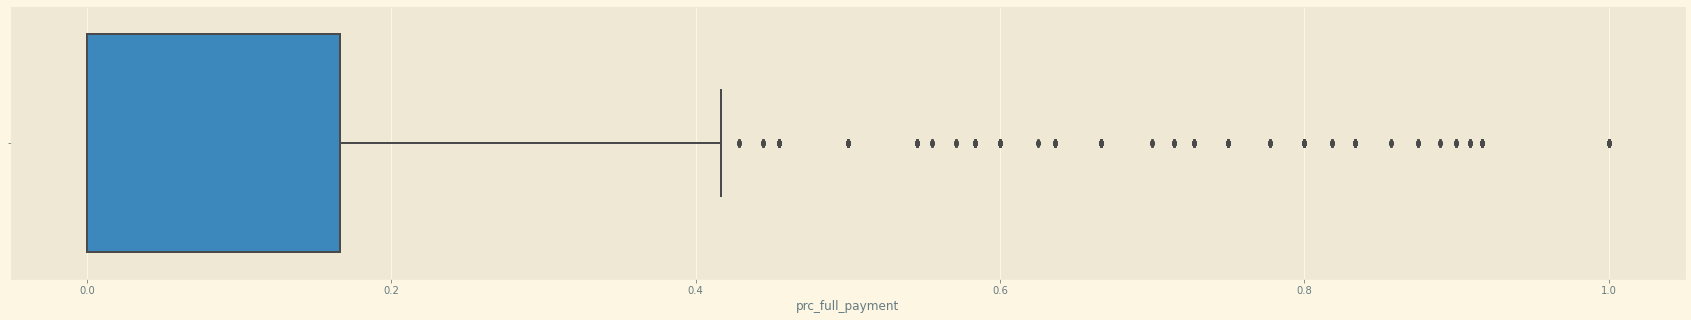

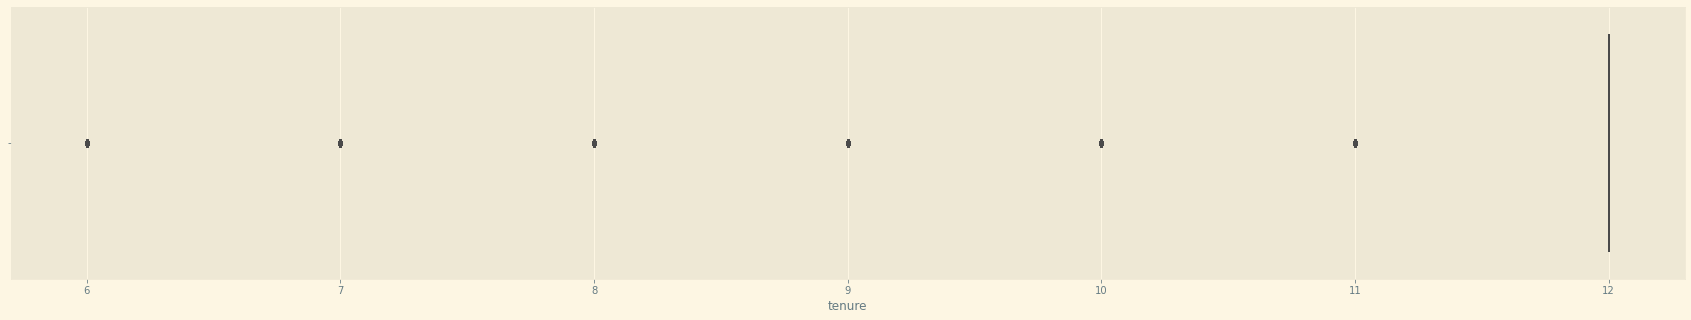

In [118]:
for column in data.columns:
    plt.figure(figsize = (30,5))
    sns.boxplot(data[column])
    plt.show()

#### Missing Values

In [119]:
data.isnull().sum().sort_values(ascending=False)

balance                             0
cash_advance_frequency              0
prc_full_payment                    0
minimum_payments                    0
payments                            0
credit_limit                        0
purchases_trx                       0
cash_advance_trx                    0
purchases_installments_frequency    0
balance_frequency                   0
oneoff_purchases_frequency          0
purchases_frequency                 0
cash_advance                        0
installments_purchases              0
oneoff_purchases                    0
purchases                           0
tenure                              0
dtype: int64

In [120]:
data.dropna(inplace=True)

In [121]:
data.isnull().sum().sort_values(ascending=False)

balance                             0
cash_advance_frequency              0
prc_full_payment                    0
minimum_payments                    0
payments                            0
credit_limit                        0
purchases_trx                       0
cash_advance_trx                    0
purchases_installments_frequency    0
balance_frequency                   0
oneoff_purchases_frequency          0
purchases_frequency                 0
cash_advance                        0
installments_purchases              0
oneoff_purchases                    0
purchases                           0
tenure                              0
dtype: int64

#### Duplicates Detection

In [122]:
data.duplicated().value_counts()

False    8636
dtype: int64

> Note: No Duplicate Data

### Log Transformation and Clipping Process

In [123]:
[i for i, k in zip(data.columns, list(data.skew())) if k > 0] 

['balance',
 'purchases',
 'oneoff_purchases',
 'installments_purchases',
 'cash_advance',
 'purchases_frequency',
 'oneoff_purchases_frequency',
 'purchases_installments_frequency',
 'cash_advance_frequency',
 'cash_advance_trx',
 'purchases_trx',
 'credit_limit',
 'payments',
 'minimum_payments',
 'prc_full_payment']

In [124]:
data = np.log10(data+1)

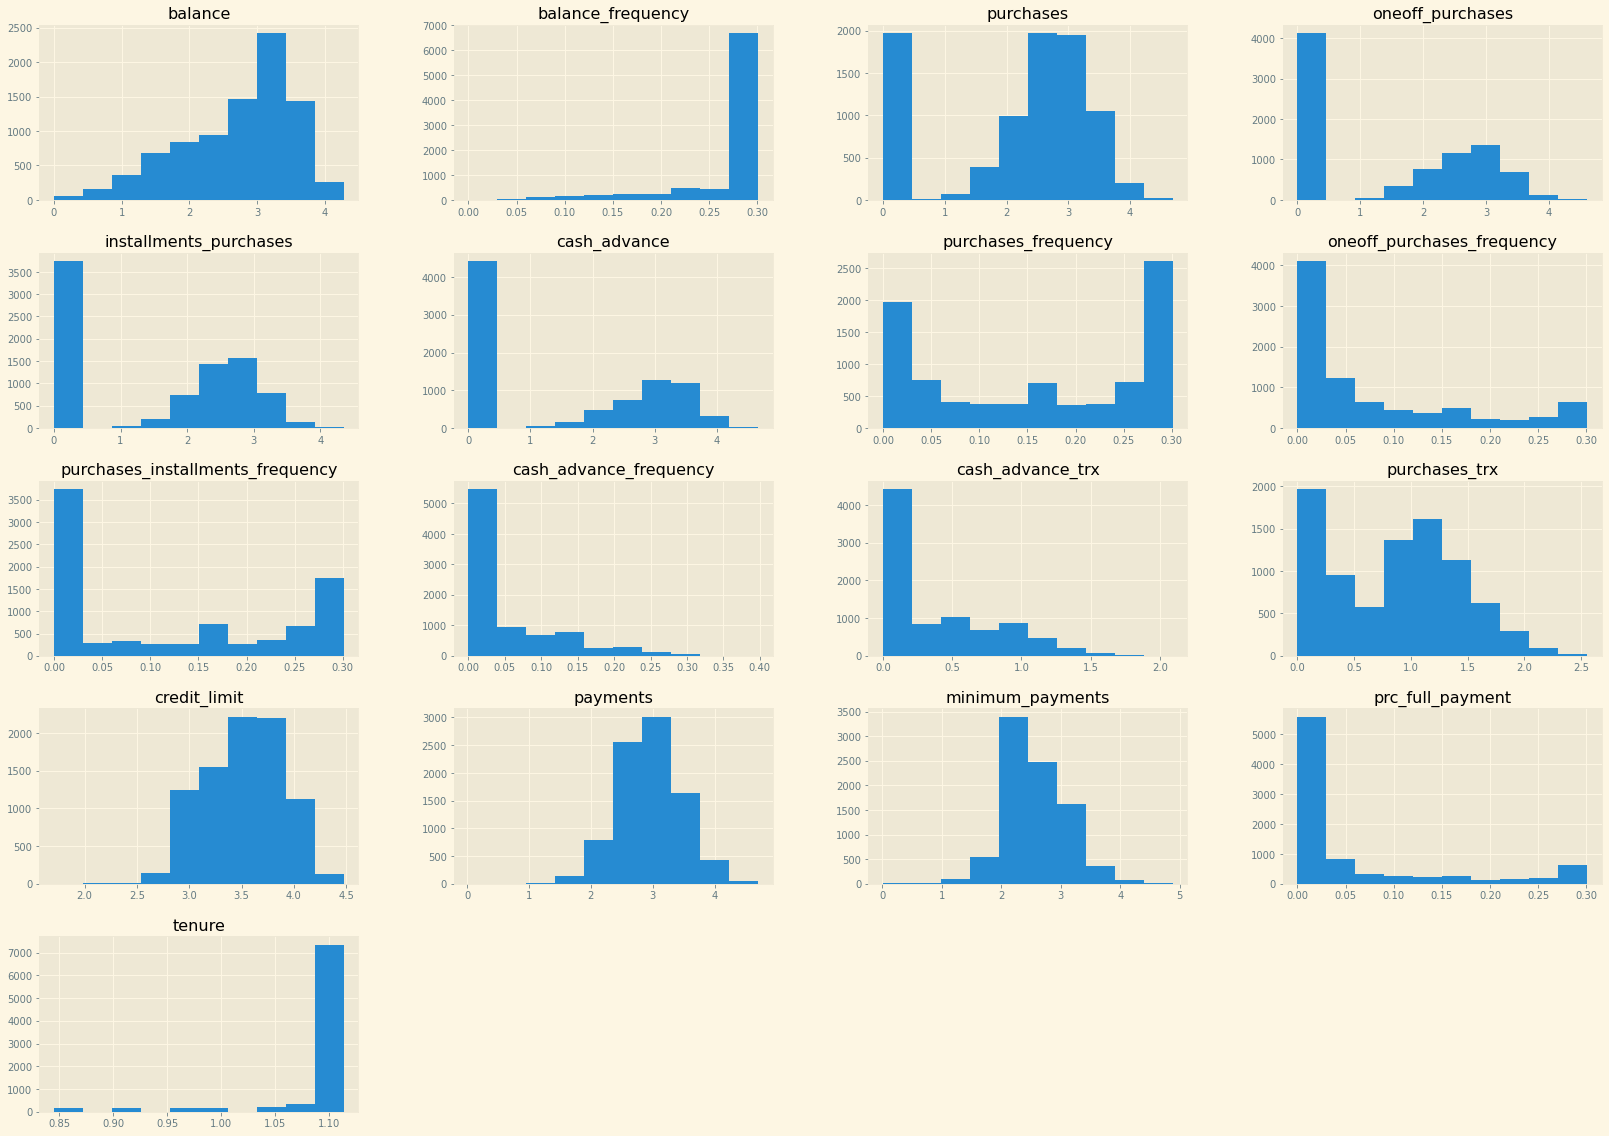

In [125]:
data.hist(figsize=(28,20))
plt.show()

In [126]:
for i in data.columns:
    upper_limit = data[i].quantile(0.95)
    lower_limit = data[i].quantile(0.05)
    data[i] = data[i].clip(lower_limit, upper_limit, axis=0)

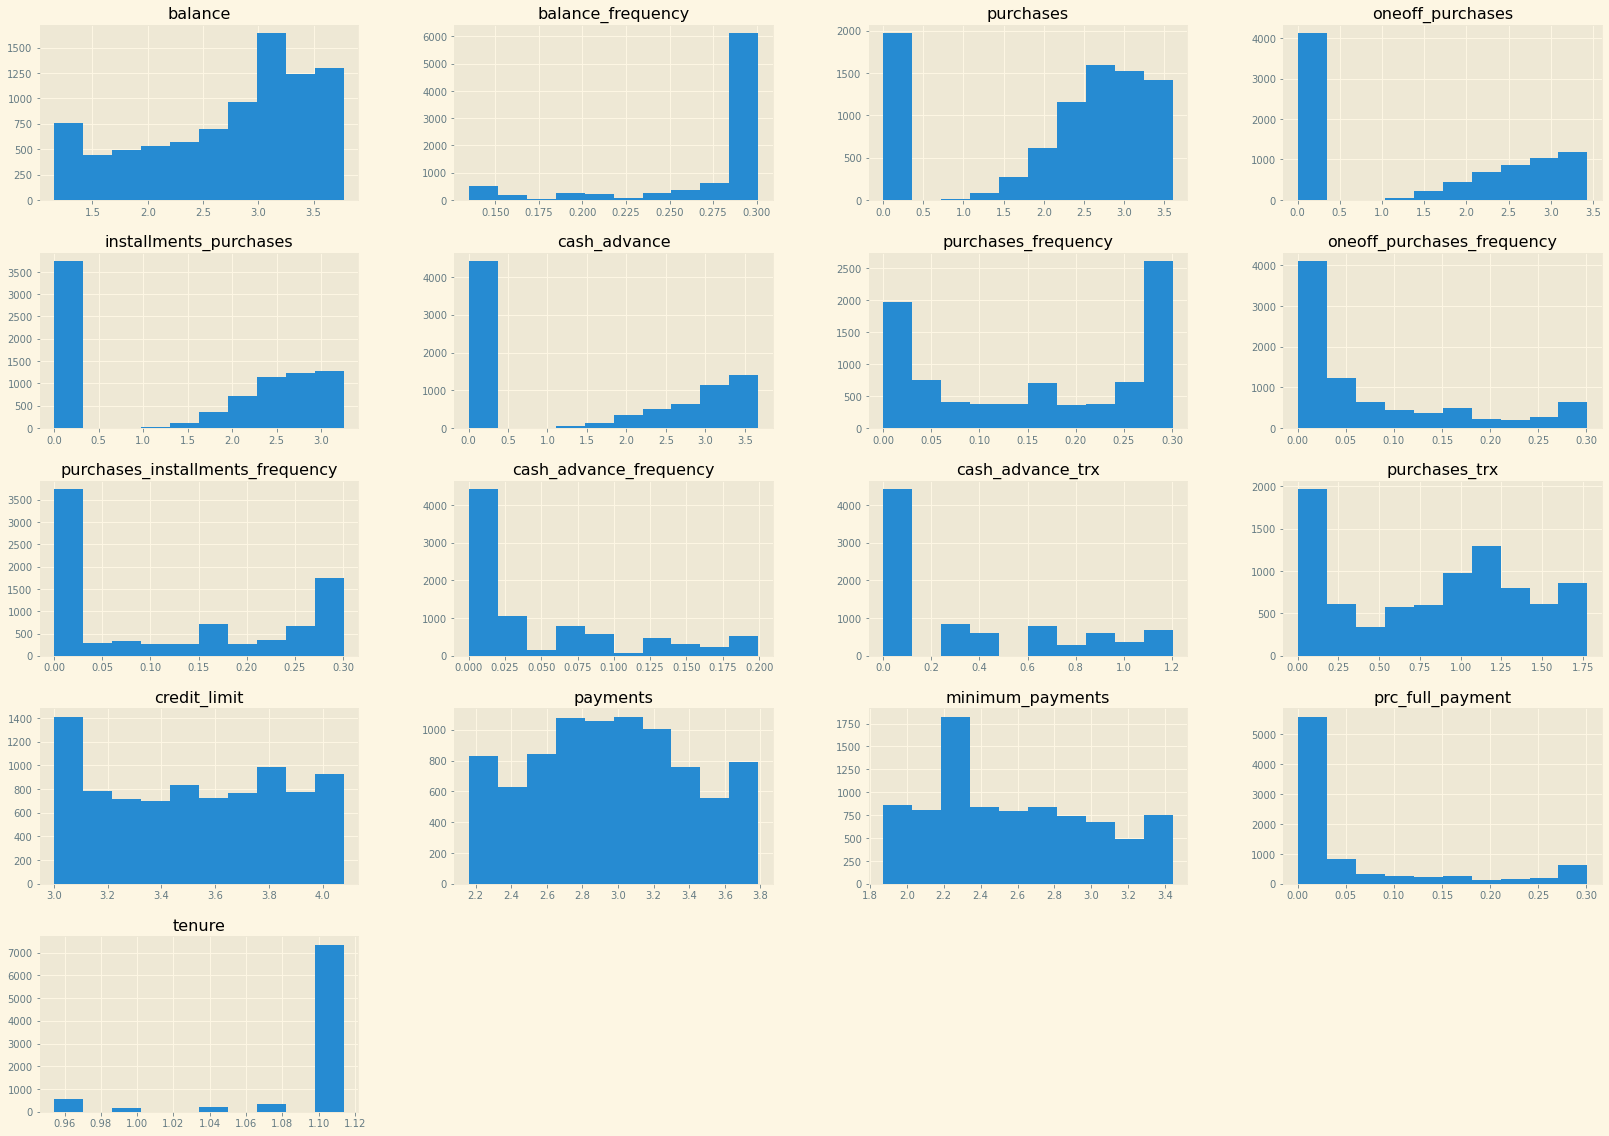

In [127]:
data.hist(figsize=(28,20))
plt.show()

In [128]:
data.describe().T

count      mean       std       min  \
balance                           8636.0  2.733418  0.770007  1.152577   
balance_frequency                 8636.0  0.276374  0.048501  0.134698   
purchases                         8636.0  2.129832  1.255048  0.000000   
oneoff_purchases                  8636.0  1.394955  1.393355  0.000000   
installments_purchases            8636.0  1.461052  1.327096  0.000000   
cash_advance                      8636.0  1.444936  1.536094  0.000000   
purchases_frequency               8636.0  0.158591  0.120401  0.000000   
oneoff_purchases_frequency        8636.0  0.070061  0.094630  0.000000   
purchases_installments_frequency  8636.0  0.118668  0.122584  0.000000   
cash_advance_frequency            8636.0  0.048205  0.063164  0.000000   
cash_advance_trx                  8636.0  0.350917  0.419097  0.000000   
purchases_trx                     8636.0  0.822950  0.581130  0.000000   
credit_limit                      8636.0  3.520431  0.334755  3.000434   
payments                          8636.0  2.961590  0.452357  2.160047   
minimum_payments                  8636.0  2.573424  0.447070  1.871331   
prc_full_payment                  8636.0  0.052989  0.093032  0.000000   
tenure                            8636.0  1.098388  0.042414  0.954243   

                                       25%       50%       75%       max  
balance                           2.173463  2.962774  3.323499  3.773614  
balance_frequency                 0.280827  0.301030  0.301030  0.301030  
purchases                         1.647065  2.575655  3.059556  3.608643  
oneoff_purchases                  0.000000  1.662711  2.778224  3.436063  
installments_purchases            0.000000  1.981297  2.685874  3.255514  
cash_advance                      0.000000  0.000000  3.054378  3.674164  
purchases_frequency               0.034762  0.176091  0.282547  0.301030  
oneoff_purchases_frequency        0.000000  0.034762  0.124939  0.301030  
purchases_installments_frequency  0.000000  0.066947  0.243038  0.301030  
cash_advance_frequency            0.000000  0.000000  0.096910  0.199572  
cash_advance_trx                  0.000000  0.000000  0.698970  1.204120  
purchases_trx                     0.301030  0.903090  1.278754  1.778151  
credit_limit                      3.204391  3.477266  3.812980  4.079217  
payments                          2.622793  2.953119  3.290511  3.789109  
minimum_payments                  2.230867  2.496171  2.917241  3.442102  
prc_full_payment                  0.000000  0.000000  0.066947  0.301030  
tenure                            1.113943  1.113943  1.113943  1.113943

### PCA

In [129]:
pca = PCA()

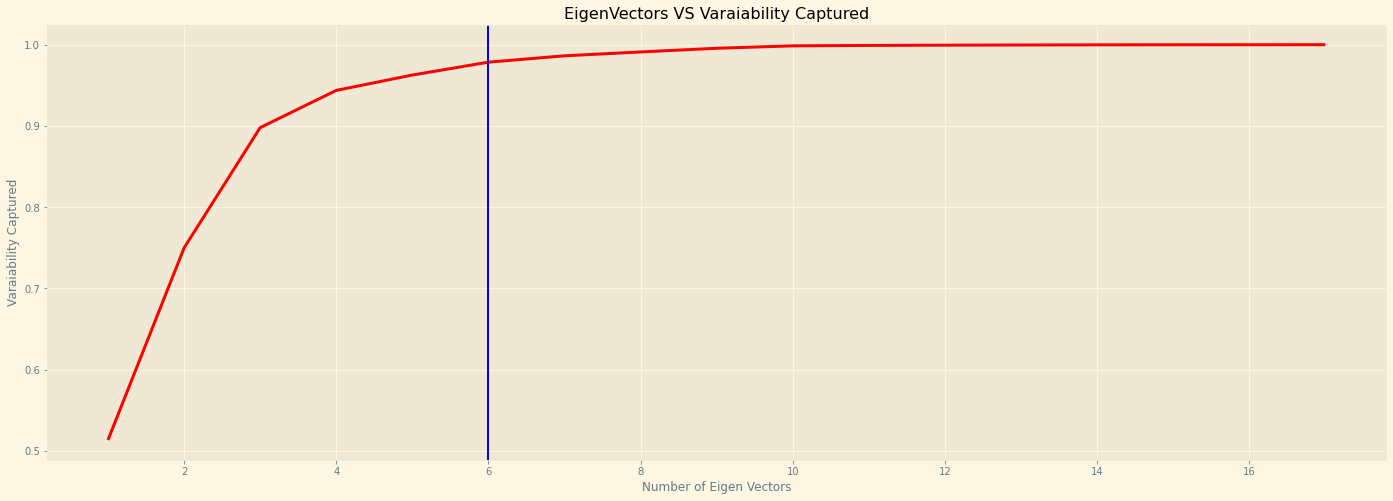

In [130]:
df_pca = pca.fit_transform(data)

d = {'Number of EigenVector': np.arange(1,len(df_pca.T)+1), 'Varaiability Captured': np.cumsum(pca.explained_variance_ratio_)}
df = pd.DataFrame(data=d)

plt.figure(figsize=(24, 8))
plt.plot(df['Number of EigenVector'], df['Varaiability Captured'], linewidth=3, linestyle=None, color="red")
plt.title('EigenVectors VS Varaiability Captured')
plt.xlabel("Number of Eigen Vectors")
plt.ylabel("Varaiability Captured")

# Added After Visualizing n_components equal to 6, 7
plt.axvline(x=6, color="blue")
plt.show()


In [131]:
gamma = 1/len(data.columns)

In [132]:
pca = PCA(n_components=6)
kpca = KernelPCA(n_components=6,kernel='rbf',gamma=gamma)

In [133]:
df_pca = pca.fit_transform(data)
df_kpca = kpca.fit_transform(data)

### t-SNE

In [134]:
tsne_projection = TSNE(n_jobs=-1, random_state=42).fit_transform(data)

### 1- Kmeans

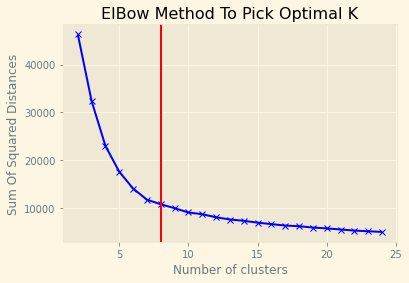

In [135]:
Sum_of_squared_distances = []

K = range(2, 25)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df_pca)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.title('ElBow Method To Pick Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Sum Of Squared Distances')
plt.axvline(x=8, color="red")
plt.show()

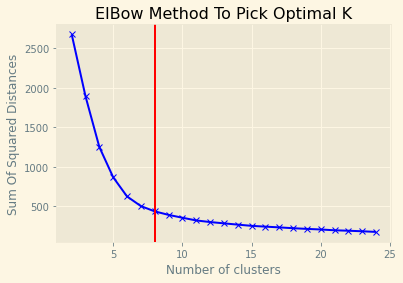

In [136]:
Sum_of_squared_distances = []

K = range(2, 25)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df_kpca)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.title('ElBow Method To Pick Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Sum Of Squared Distances')
plt.axvline(x=8, color="red")
plt.show()

In [144]:
kmeans = KMeans(n_clusters=7,  random_state=42)
labels = kmeans.fit_predict(df_pca)

tsne_projection = pd.DataFrame(tsne_projection, columns=['X', 'Y'],index=data.index.tolist())
tsne_projection['cluster'] = labels
px.scatter(tsne_projection, x='X', y='Y', color='cluster')

In [145]:
tsne_projection['cluster'].value_counts().sort_values(ascending=True)

3     462
2     757
4     962
6    1048
0    1653
5    1765
1    1989
Name: cluster, dtype: int64

In [146]:
print("Score: {:.3f}".format(silhouette_score(df_pca, kmeans.labels_, metric='euclidean')))

Score: 0.527


In [147]:
kmeans = KMeans(n_clusters=7,  random_state=42)
labels = kmeans.fit_predict(df_kpca)

tsne_projection = pd.DataFrame(tsne_projection, columns=['X', 'Y'],index=data.index.tolist())
tsne_projection['cluster'] = labels
px.scatter(tsne_projection, x='X', y='Y', color='cluster')

In [148]:
tsne_projection['cluster'].value_counts().sort_values(ascending=True)

3     462
1     745
6     964
2    1069
0    1634
5    1769
4    1993
Name: cluster, dtype: int64

In [149]:
print("Score: {:.3f}".format(silhouette_score(df_kpca, kmeans.labels_, metric='euclidean')))

Score: 0.609


### 2- Hierarchical Clustering

In [150]:
clustering = AgglomerativeClustering(n_clusters=7, linkage='ward').fit(df_pca)
labels = clustering.labels_

tsne_projection = pd.DataFrame(tsne_projection, columns=['X', 'Y'],index=data.index.tolist())
tsne_projection['cluster'] = clustering.labels_

px.scatter(tsne_projection, x='X', y='Y', color="cluster")

In [151]:
tsne_projection['cluster'].value_counts().sort_values(ascending=True)

6     460
5     770
2    1004
4    1006
3    1696
0    1727
1    1973
Name: cluster, dtype: int64

In [152]:
print("Score: {:.3f}".format(silhouette_score(df_kpca, clustering.labels_, metric='euclidean')))

Score: 0.600


In [156]:
clustering = AgglomerativeClustering(n_clusters=7, linkage='ward').fit(df_kpca)
labels = clustering.labels_

tsne_projection = pd.DataFrame(tsne_projection, columns=['X', 'Y'],index=data.index.tolist())
tsne_projection['cluster'] = clustering.labels_

px.scatter(tsne_projection, x='X', y='Y', color="cluster")

In [158]:
tsne_projection['cluster'].value_counts().sort_values(ascending=True)

6     460
5     770
3    1004
4    1006
0    1696
2    1727
1    1973
Name: cluster, dtype: int64

In [159]:
print("Score: {:.3f}".format(silhouette_score(df_kpca, clustering.labels_, metric='euclidean')))

Score: 0.600


### 3- DBSCAN

In [161]:
def Knn(data):
    mins = 5
    knn = NearestNeighbors(mins + 1)

    knn.fit(data)

    distances, neighbors = knn.kneighbors(data)

    distances = np.sort(distances[:, mins], axis = 0)
    
    return distances

In [162]:
def plot_distances(distances, flag, linex):
    distances_df = pd.DataFrame({"distances": distances, "index": list(range(0,len(distances)))})
    plt.plot(distances_df['index'], distances_df['distances'], color="red", linewidth=3, linestyle=None)
    if flag==1:
        plt.title("Elbow Method for Choosing eps for Robust PCA")
        plt.axhline(y=linex)
    elif flag==2:
        plt.title("Elbow Method for Choosing eps for Robust KPCA")
    elif flag==3:
        plt.title("Elbow Method for Choosing eps for Quantile PCA")
    elif flag==4:
        plt.title("Elbow Method for Choosing eps for Quantile KPCA")
    plt.axhline(y=linex)
    plt.show()

In [163]:
distances_pca = Knn(df_pca)
distances_kpca = Knn(df_kpca)

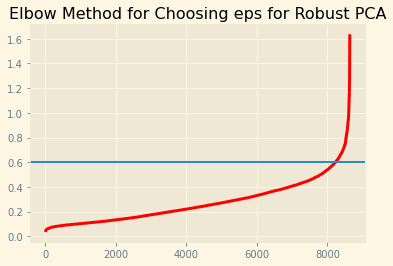

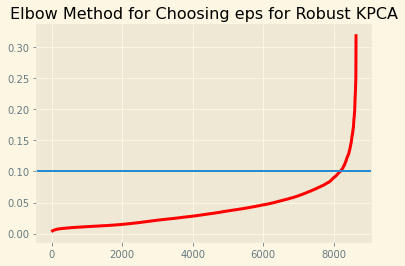

In [167]:
plot_distances(distances_pca, 1, 0.6)
plot_distances(distances_kpca, 2, 0.1)

In [174]:
dbscan = DBSCAN(eps=0.7, min_samples=5).fit(df_pca)
labels = dbscan.labels_
tsne_projection = pd.DataFrame(tsne_projection, columns=['X', 'Y'],index=data.index.tolist())
tsne_projection['cluster'] = labels
px.scatter(tsne_projection, x='X', y='Y', color="cluster")

In [175]:
tsne_projection['cluster'].value_counts().sort_values(ascending=False)

 0    3417
 1    1970
 2    1003
 4     974
 5     758
 3     444
-1      70
Name: cluster, dtype: int64

In [176]:
print("Score: {:.3f}".format(silhouette_score(df_pca, labels)))

Score: 0.432


In [190]:
dbscan = DBSCAN(eps=0.1, min_samples=10).fit(df_kpca)
labels = dbscan.labels_
tsne_projection = pd.DataFrame(tsne_projection, columns=['X', 'Y'],index=data.index.tolist())
tsne_projection['cluster'] = labels
px.scatter(tsne_projection, x='X', y='Y', color="cluster")

In [191]:
tsne_projection['cluster'].value_counts().sort_values(ascending=False)

 1    1969
 0    1688
 3    1685
 2     999
 5     837
 6     669
 4     393
-1     384
 7      12
Name: cluster, dtype: int64

### Isolated Random Forest

In [194]:
IRF = IsolationForest(random_state=42, bootstrap=True, n_jobs=-1).fit(df_pca)
y_pred = IRF.predict(df_pca)

In [195]:
tsne_projection = pd.DataFrame(tsne_projection, columns=['X', 'Y'], index=data.index.tolist())
tsne_projection['Prediction'] = (y_pred).tolist()
px.scatter(tsne_projection, x='X', y='Y', color="Prediction")

In [196]:
tsne_projection['Prediction'].value_counts(sort=True)

 1    6624
-1    2012
Name: Prediction, dtype: int64

In [198]:
print("Score: {:.3f}".format(silhouette_score(df_pca, y_pred, metric='euclidean')))

Score: 0.052


In [199]:
IRF = IsolationForest(random_state=42, bootstrap=True, n_jobs=-1).fit(df_kpca)
y_pred = IRF.predict(df_kpca)

In [200]:
tsne_projection = pd.DataFrame(tsne_projection, columns=['X', 'Y'], index=data.index.tolist())
tsne_projection['Prediction'] = (y_pred).tolist()
px.scatter(tsne_projection, x='X', y='Y', color="Prediction")

In [201]:
tsne_projection['Prediction'].value_counts(sort=True)

 1    6122
-1    2514
Name: Prediction, dtype: int64

In [202]:
print("Score: {:.3f}".format(silhouette_score(df_pca, y_pred, metric='euclidean')))

Score: 0.063


### EM

In [203]:
em = GaussianMixture(n_components=7, random_state=42).fit(df_pca)
y_pred = em.predict(df_pca)

In [204]:
tsne_projection = pd.DataFrame(tsne_projection, columns=['X', 'Y'],index=data.index.tolist())
tsne_projection['Prediction'] = (y_pred).tolist()

px.scatter(tsne_projection, x='X', y='Y', color="Prediction")


In [205]:
tsne_projection['Prediction'].value_counts(sort=True)

1    1962
4    1729
2    1466
6    1157
5    1005
3     779
0     538
Name: Prediction, dtype: int64

In [206]:
print("Score: {:.3f}".format(silhouette_score(df_pca, y_pred, metric='euclidean')))

Score: 0.452


In [208]:
em = GaussianMixture(n_components=7, random_state=42).fit(df_kpca)
y_pred = em.predict(df_kpca)

In [209]:
tsne_projection = pd.DataFrame(tsne_projection, columns=['X', 'Y'],index=data.index.tolist())
tsne_projection['Prediction'] = (y_pred).tolist()

px.scatter(tsne_projection, x='X', y='Y', color="Prediction")

In [210]:
tsne_projection['Prediction'].value_counts(sort=True)

1    1966
2    1806
3    1721
6    1021
5    1000
0     673
4     449
Name: Prediction, dtype: int64

In [211]:
print("Score: {:.3f}".format(silhouette_score(df_pca, y_pred, metric='euclidean')))

Score: 0.440
